#### Machine Learning and Statistics - 2021 Project Submission

#### GMIT Higher Diploma in Data Analytics

#### Submitted by Fiona Lee - 19 December 2021

#### Development of Scikit-Learn
Scikit-learn was originally called 'scikits.learn'.  It was initially developed by David Cournapeau as a Google summer of code project in 2007. Fabian Pedregosa, Gael Varoquaux, Alexandre Gramfort, and Vincent Michel, from FIRCA (French Institute for Research in Computer Science and Automation) further developed the project releasing it publicly on 1st Feb. 2010.
https://www.tutorialspoint.com/scikit_learn/scikit_learn_introduction.htm

#### What is Scikit-Learn?
Scikit-learn (Sklearn) is an open-source package. It is renowned as being the most useful and robust library for creating and evaluating machine learning models in Python.  It provides a selection of tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction. https://www.tutorialspoint.com/scikit_learn/scikit_learn_tutorial.pdf


#### What does Scikit-Learn do & what is is it used for?
Scikit-Learn allows you to define machine learning algorithms and to evaluate different algorithms against eachother.  Scikit-learn also includes a model evaluation and selection framework which cross-validates and performs hyperparameter searches of models to confirm that the best model possible as been used. https://www.springboard.com/library/machine-learning-engineering/scikit-learn-vs-tensorflow/#:~:text=Scikit-Learn%20is%20an%20open-source%20package%20for%20creating%20and,includes%20tools%20to%20help%20you%20preprocess%20your%20dataset.


#### Installation:

The following commands can be used to install scikit-learn:

via pip: 
pip install -U scikit-learn

via conda: 
conda install scikit-learn

#### Popular models provided by Scikit-learn

Supervised Learning algorithms − Linear Regression, Support Vector Machine (SVM) and Decision Tree 

Unsupervised Learning algorithms − Clustering, factor analysis, PCA (Principal Component Analysis) and unsupervised neural networks.

Clustering − Groups unlabeled data

Cross Validation − To check the accuracy of supervised models on unseen data

Dimensionality Reduction − Reduces the number of attributes in data which can be further used for summarisation, visualisation and feature selection

Ensemble methods − Combines the predictions of multiple supervised models

Feature extraction − Extracts the features from data to define the attributes in image and text data

Feature selection − Identifies useful attributes to create supervised models

https://www.tutorialspoint.com/scikit_learn/scikit_learn_modelling_process.htm


#### Datasets Inputs (attribute/predictor/feature) and Outputs (target/label/response)

Features − The variables of data are called its features. 

Feature Matrix − Collection of features (if more than one)

Feature Names − List of all the names of the features

Response − The output variable that is determined by the feature variables. Also known as target, label or output.

Response Vector − Represents the response column (usually just one)

Target Names − Represents the possible values taken by a response vector

#### About the Abalone Dataset

Abalones are marine snails with an ear-shaped shell lined with mother of pearl. 56 species of abalones have been validated with an 18 additional subspecies.

![alt text](https://github.com/Fiona-600/Machine-Learning-and-Statistics-Project/blob/main/abalone-image.jpg)

***Repository Link: https://github.com/Fiona-600/Machine-Learning-and-Statistics-Project/blob/main/abalone-image.jpg***

##### Attributes:

- 'Sex': M, F, and I (male, female, infant) 
- 'Length': Longest shell measurement (mm) 
- 'Diameter': Perpendicular to length (mm) 
- 'Height': Height with meat in shell (mm) 
- 'Whole weight': Whole abalone (grams) 
- 'Shucked weight': Weight of meat (grams) 
- 'Viscera weight': Gut weight after bleeding (grams) 
- 'Shell weight': Weight after being dried (grams) 
- 'Rings':  Age in years

#### Purpose of the Analysis

The purpose of the analysis of the dataset is to predict the age of an abalone from its physical measurements (attributes) using machine learning rather than manually counting the number of rings on its shell .

In [1]:
# Import Modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as mod
import sklearn.linear_model as lm  # Logistic regression
import sklearn.neighbors as nei    # K nearest neighbours

### Import the Abalone Dataset

In [2]:
# Set default seaborn style
sns.set

# Redirect output of analysis.py
# Ref Source: https://stackoverflow.com/questions/7152762/how-to-redirect-print-output-to-a-file-using-python
# import sys
# sys.stdout=open("abalone.csv","w")

abalone = pd.read_csv("abalone.csv" , names = None , index_col = None)
abalone_df = pd.DataFrame(abalone)
abalone_df.columns=['Sex','Length', 'Diameter', 'Height','Whole_Weight', 'Schucked_Weight', 'Viscera_Weight', 'Shell_Weight','Rings']
abalone_df = abalone_df.replace('I','Infant')
abalone_df = abalone_df.replace('M','Male')
abalone_df = abalone_df.replace('F','Female')
pd.set_option("display.max_rows", None)   # Show the entire dataset
pd.set_option('expand_frame_repr', False) # Print the dataframe on a single line

### Check if there are any empty cells in the dataset ###

In [3]:
#Option to print the dataset and highlight any null values in red
#abalone_df.style.highlight_null(null_color='red')

#Option to print the dataset with True/False Values
#print(abalone_df.isnull())  

#Alternative method (https://stackoverflow.com/questions/30447083/python-pandas-return-only-those-rows-which-have-missing-values)
#abalone_df[pd.isnull(abalone_df).any(axis=1)]

#*Note not printed due to the size of the dataset.  No null values noted*

### Analyse the Dataset

In [4]:
print ("ABALONE DATA SET - First 10 Results".center (100))
print ("")
print (abalone_df.head(10))

                                ABALONE DATA SET - First 10 Results                                 

      Sex  Length  Diameter  Height  Whole_Weight  Schucked_Weight  Viscera_Weight  Shell_Weight  Rings
0    Male   0.350     0.265   0.090        0.2255           0.0995          0.0485         0.070      7
1  Female   0.530     0.420   0.135        0.6770           0.2565          0.1415         0.210      9
2    Male   0.440     0.365   0.125        0.5160           0.2155          0.1140         0.155     10
3  Infant   0.330     0.255   0.080        0.2050           0.0895          0.0395         0.055      7
4  Infant   0.425     0.300   0.095        0.3515           0.1410          0.0775         0.120      8
5  Female   0.530     0.415   0.150        0.7775           0.2370          0.1415         0.330     20
6  Female   0.545     0.425   0.125        0.7680           0.2940          0.1495         0.260     16
7    Male   0.475     0.370   0.125        0.5095           0.2165

In [5]:
print ("ABALONE DATA SET - Number of Samples of each class (Sex)".center (100))
print ("")
print(abalone_df.value_counts('Sex'))

                      ABALONE DATA SET - Number of Samples of each class (Sex)                      

Sex
Male      1527
Infant    1342
Female    1307
dtype: int64


In [95]:
woman_df = abalone_df[abalone_df['Sex'] == 'Female']
man_df = abalone_df[abalone_df['Sex'] == 'Male']
child_df = abalone_df[abalone_df['Sex'] == 'Infant']

In [7]:
print ("ABALONE DATA SET -  Number of rows and columns in the dataset".center (100))
print ("")
print (abalone_df.shape)

                   ABALONE DATA SET -  Number of rows and columns in the dataset                    

(4176, 9)


In [8]:
print ("ABALONE DATA SET -  General information about the dataset".center (100))
print ("")
pd.set_option("display.precision", 4)
print(abalone_df.describe())

                     ABALONE DATA SET -  General information about the dataset                      

          Length   Diameter     Height  Whole_Weight  Schucked_Weight  Viscera_Weight  Shell_Weight      Rings
count  4176.0000  4176.0000  4176.0000     4176.0000        4176.0000       4176.0000     4176.0000  4176.0000
mean      0.5240     0.4079     0.1395        0.8288           0.3594          0.1806        0.2389     9.9325
std       0.1201     0.0992     0.0418        0.4904           0.2220          0.1096        0.1392     3.2236
min       0.0750     0.0550     0.0000        0.0020           0.0010          0.0005        0.0015     1.0000
25%       0.4500     0.3500     0.1150        0.4415           0.1860          0.0934        0.1300     8.0000
50%       0.5450     0.4250     0.1400        0.7997           0.3360          0.1710        0.2340     9.0000
75%       0.6150     0.4800     0.1650        1.1532           0.5020          0.2530        0.3290    11.0000
max       

In [9]:
print ("ABALONE DATA SET -  General information about the dataset by class (Female, Male, Infant)".center (100))
print ("")
pd.set_option("display.precision", 4)
pd.set_option('expand_frame_repr', False) # Print the dataframe on a single line
print ("Female".center (100))
print(woman.describe())
print("")
print ("Male".center (100))
print(man.describe())
print("")
print ("Infant".center (100))
print(child.describe())

     ABALONE DATA SET -  General information about the dataset by class (Female, Male, Infant)      

                                               Female                                               
          Length   Diameter    Height  Whole_Weight  Schucked_Weight  Viscera_Weight  Shell_Weight      Rings
count  1307.0000  1307.0000  1307.000     1307.0000        1307.0000       1307.0000     1307.0000  1307.0000
mean      0.5791     0.4547     0.158        1.0465           0.4462          0.2307        0.3020    11.1293
std       0.0862     0.0710     0.040        0.4303           0.1987          0.0976        0.1256     3.1043
min       0.2750     0.1950     0.015        0.0800           0.0310          0.0210        0.0250     5.0000
25%       0.5250     0.4100     0.140        0.7300           0.2950          0.1590        0.2132     9.0000
50%       0.5900     0.4650     0.160        1.0385           0.4405          0.2240        0.2950    10.0000
75%       0.6400     0.5050

In [10]:
print ("ABALONE DATA SET - Mean, Median, Standard Deviation, Min and Max Values".center (100))
print ("")
#pd.set_option('expand_frame_repr', True) # Print the dataframe on a single line
pd.set_option("display.precision", 2) # Use 2 decimal places in output display
print ("Length (mm):".center(40))
print (abalone_df.groupby(['Sex']).agg(['mean', 'median', 'std', 'min', 'max']).Length)
print ("")
print ("Diameter (mm):".center(40))
print (abalone_df.groupby(['Sex']).agg(['mean', 'median' , 'std', 'min', 'max']).Diameter)
print ("")
print ("Height (mm):".center(40))
print (abalone_df.groupby(['Sex']).agg(['mean', 'median' , 'std', 'min', 'max']).Height)
print ("")
pd.set_option("display.precision", 3)
print ("Whole Weight (grams):".center(40))
print (abalone_df.groupby(['Sex']).agg(['mean', 'median' , 'std', 'min', 'max']).Whole_Weight)
print ("")
print ("Schucked Weight (grams):".center(40))
print (abalone_df.groupby(['Sex']).agg(['mean', 'median' , 'std', 'min', 'max']).Schucked_Weight)
print ("")
pd.set_option("display.precision", 4)
print ("Visceral Weight (grams):".center(40))
print (abalone_df.groupby(['Sex']).agg(['mean', 'median' , 'std', 'min', 'max']).Viscera_Weight)
print ("")
pd.set_option("display.precision", 3)
print ("Shell Weight (grams):".center(40))
print (abalone_df.groupby(['Sex']).agg(['mean', 'median' , 'std', 'min', 'max']).Shell_Weight)
print ("")
pd.set_option("display.precision", 1)
print ("Age (number of rings):".center(40))
print (abalone_df.groupby(['Sex']).agg(['mean', 'median' , 'std', 'min', 'max']).Rings)


              ABALONE DATA SET - Mean, Median, Standard Deviation, Min and Max Values               

              Length (mm):              
        mean  median   std   min   max
Sex                                   
Female  0.58    0.59  0.09  0.28  0.81
Infant  0.43    0.43  0.11  0.07  0.72
Male    0.56    0.58  0.10  0.15  0.78

             Diameter (mm):             
        mean  median   std   min   max
Sex                                   
Female  0.45    0.47  0.07  0.20  0.65
Infant  0.33    0.34  0.09  0.06  0.55
Male    0.44    0.46  0.08  0.11  0.63

              Height (mm):              
        mean  median   std   min   max
Sex                                   
Female  0.16    0.16  0.04  0.01  1.13
Infant  0.11    0.11  0.03  0.00  0.22
Male    0.15    0.15  0.03  0.03  0.52

         Whole Weight (grams):          
         mean  median    std    min    max
Sex                                       
Female  1.047   1.038  0.430  0.080  2.657
Infant  0.431   0

                        Chart of Female Ages
                         


C:\Users\fiona\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\fiona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


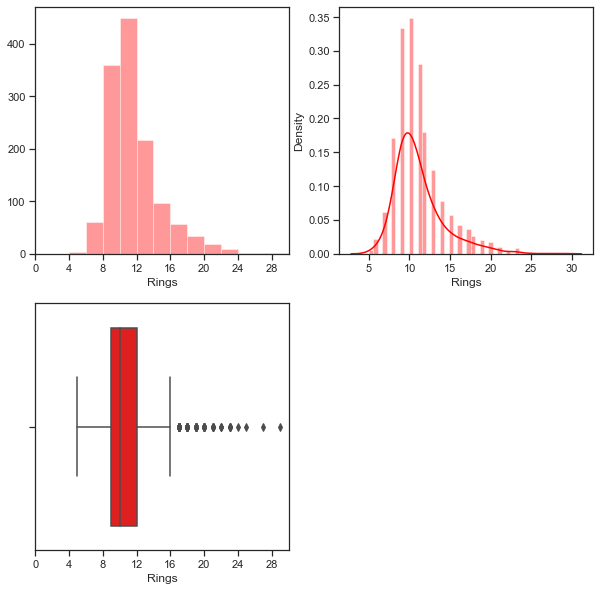

In [122]:
print(("Chart of Female Ages\n").center(70))

rows = 2
cols = 2
i = 0

plt.figure(figsize=(cols * 5, rows * 5))

i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.distplot(woman_df["Rings"], kde=False, bins=range(0, 31, 2), color = "red")
#_ = sns.distplot(woman_df["Rings"], kde=False, bins=range(0, 31, 2), color = "red"). set (title='Chart of Female Ages') 
i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(woman_df["Rings"], color = "red")

i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.boxplot(woman_df["Rings"], color = "red")

                         Chart of Male Ages
                          


C:\Users\fiona\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\fiona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


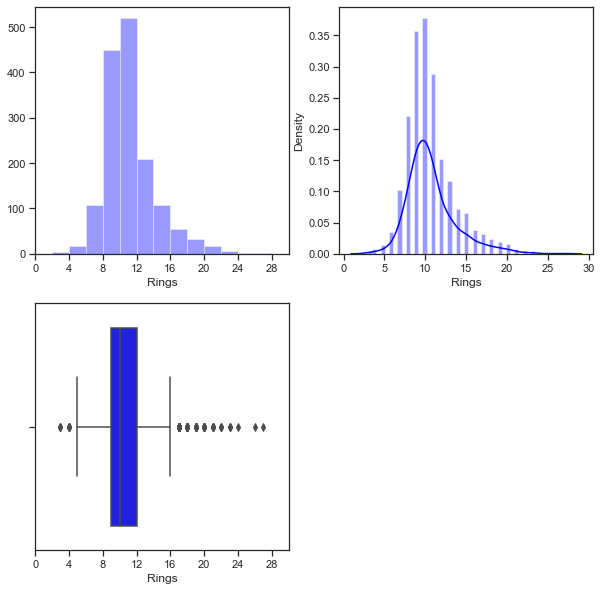

In [125]:
print(("Chart of Male Ages\n").center(70))

rows = 2
cols = 2
i = 0

plt.figure(figsize=(cols * 5, rows * 5))

i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.distplot(man_df["Rings"], kde=False, bins=range(0, 31, 2), color = "blue")
#_ = sns.distplot(woman_df["Rings"], kde=False, bins=range(0, 31, 2), color = "red"). set (title='Chart of Female Ages') 
i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(man_df["Rings"], color = "blue")

i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.boxplot(man_df["Rings"], color = "blue")

                        Chart of Infant Ages
                         


C:\Users\fiona\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\fiona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


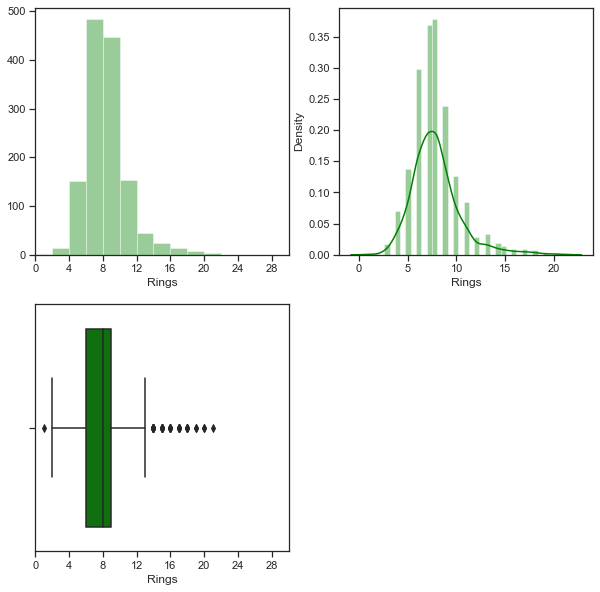

In [127]:
print(("Chart of Infant Ages\n").center(70))

rows = 2
cols = 2
i = 0

plt.figure(figsize=(cols * 5, rows * 5))

i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.distplot(child_df["Rings"], kde=False, bins=range(0, 31, 2), color = "green")
#_ = sns.distplot(woman_df["Rings"], kde=False, bins=range(0, 31, 2), color = "red"). set (title='Chart of Female Ages') 
i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(child_df["Rings"], color = "green")

i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.boxplot(child_df["Rings"], color = "green")

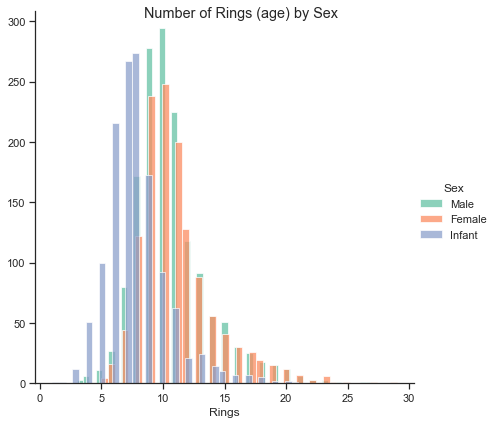

In [62]:
#ABALONE DATA SET - MULTI DIMENSIONAL HISTOGRAMS (By Age & Sex)

Age = sns.FacetGrid (abalone_df, height = 6, hue = "Sex").map(sns.histplot,"Rings").add_legend().fig.suptitle('Number of Rings (age) by Sex') 
sns.set_style ("whitegrid")
sns.set_style ("ticks")
a4_dims = (11.7, 8.27)
fig , Age = sns.figsize = a4_dims
plt.show()


In [ ]:
# Underlying data to chart above:

In [83]:
#abalone_df.loc[abalone_df["Sex"] == "Female","Rings"].value_counts()

In [84]:
#abalone_df.loc[abalone_df["Sex"] == "Male","Rings"].value_counts()

In [87]:
#abalone_df.loc[abalone_df["Sex"] == "Infant","Rings"].value_counts()

Number of Rings (age) - All Sexes:


C:\Users\fiona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


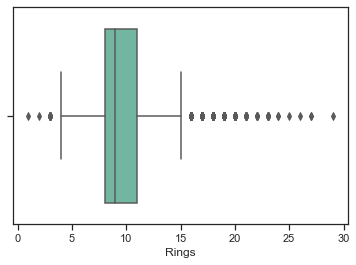

Number of Rings (age) - Female:


C:\Users\fiona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


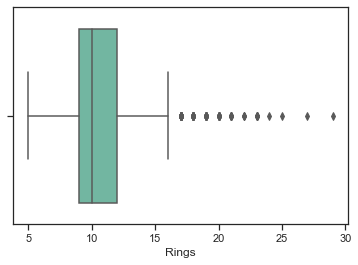

C:\Users\fiona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Number of Rings (age) - Male:


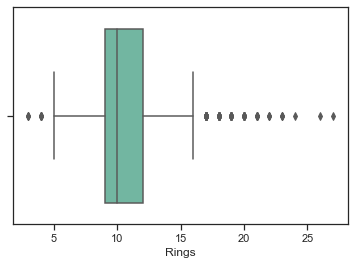

C:\Users\fiona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Number of Rings (age) - Infants:


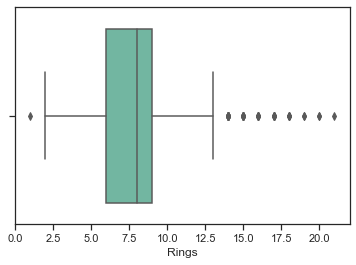

In [77]:
print("Number of Rings (age) - All Sexes:")
sns.boxplot(abalone_df['Rings'])
plt.show()
print("Number of Rings (age) - Female:")
sns.boxplot(abalone_df.loc[abalone_df["Sex"] == "Female","Rings"])
plt.show()
print("Number of Rings (age) - Male:")
sns.boxplot(abalone_df.loc[abalone_df["Sex"] == "Male","Rings"])
plt.show()
print("Number of Rings (age) - Infants:")
sns.boxplot(abalone_df.loc[abalone_df["Sex"] == "Infant","Rings"])
plt.show()

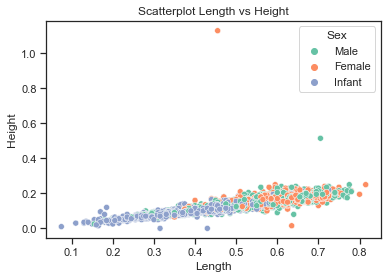

In [13]:
# ABALONE DATA SET - SCATTER PLOTS BY SEX - WITHOUT REGRESSION LINES:
# Ref Source: Scatterplot Tutorial - https://seaborn.pydata.org/generated/seaborn.scatterplot.html

sns.set (style = "whitegrid", palette ='Set2')
sns.set_style ("ticks")
ax = sns.scatterplot (x = "Length", y ="Height", hue = "Sex", data = abalone_df)
ax.set_title ("Scatterplot Length vs Height")
a4_dims = (11.7, 8.27)
fig, ax = sns.figsize = a4_dims
plt.show()

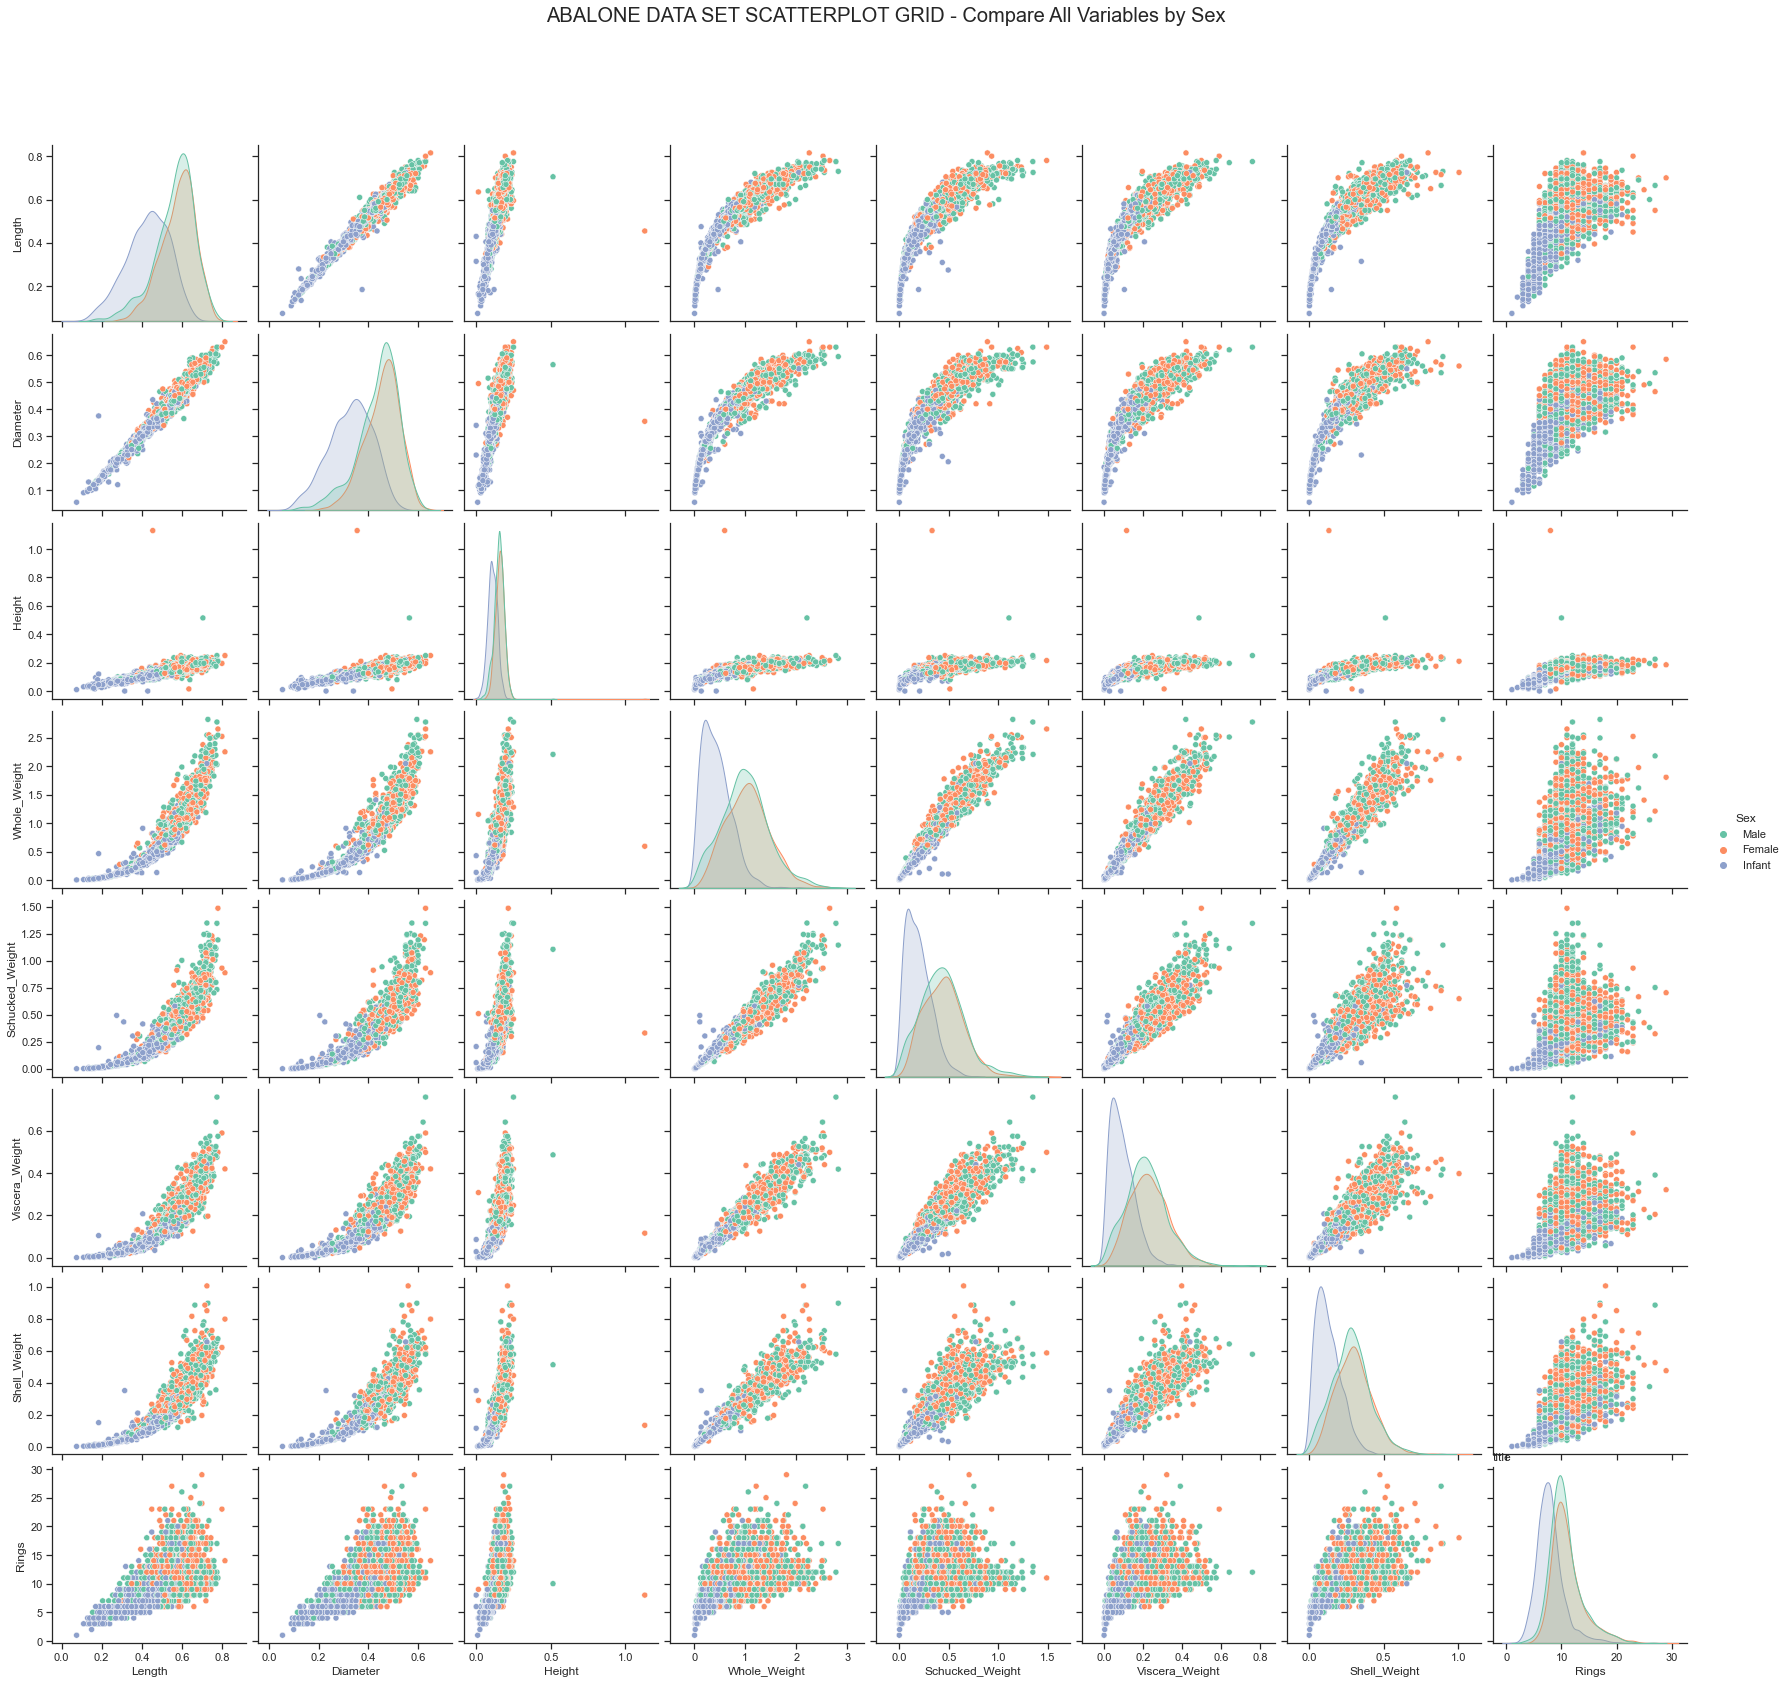

In [14]:
# ABALONE DATA SET - SCATTERPLOT GRID COMPARING ALL VARIABLES
#sns.set_style ("whitegrid")
#sns.set_style ("ticks")
ax = sns.pairplot (abalone_df, hue="Sex", height=3);
plt.title('title', loc ='left')
plt.subplots_adjust(top=0.9)
ax.fig.suptitle ("ABALONE DATA SET SCATTERPLOT GRID - Compare All Variables by Sex", fontsize = 20)
# Scale to print on A4 sheet
a4_dims = (11.7, 8.27)
fig, ax = sns.figsize = a4_dims
plt.show()

In [15]:
print ("ABALONE DATA SET- List of columns and data types".center(100))
print ("")
print (abalone_df.info())
print ("")

                          ABALONE DATA SET- List of columns and data types                          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              4176 non-null   object 
 1   Length           4176 non-null   float64
 2   Diameter         4176 non-null   float64
 3   Height           4176 non-null   float64
 4   Whole_Weight     4176 non-null   float64
 5   Schucked_Weight  4176 non-null   float64
 6   Viscera_Weight   4176 non-null   float64
 7   Shell_Weight     4176 non-null   float64
 8   Rings            4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None



#### Test and Train Split

In [16]:
# Split the data frame in two using sklearn model selection (mod)
train, test = mod.train_test_split(abalone_df)

In [17]:
# Show some training data.
pd.set_option("display.precision", 3)
train.head()

,Sex,Length,Diameter,Height,Whole_Weight,Schucked_Weight,Viscera_Weight,Shell_Weight,Rings
3544,Infant,0.475,0.360,0.135,0.435,0.196,0.092,0.125,8
1469,Infant,0.530,0.430,0.130,0.705,0.346,0.141,0.189,9
2370,Male,0.180,0.125,0.050,0.023,0.009,0.005,0.010,3
2865,Infant,0.320,0.205,0.080,0.181,0.088,0.034,0.050,5
2501,Infant,0.285,0.210,0.070,0.109,0.044,0.026,0.033,5


In [18]:
print("The number of samples in the test data is",train.index.size)

The number of samples in the test data is 3132


In [19]:
# The indices of the data included in the train array.
train.index

Int64Index([3544, 1469, 2370, 2865, 2501, 2016, 1507, 2506, 3462, 2378,
            ...
            2216, 1497,  761,  732, 2448, 2835, 3114, 2749, 2494, 1568],
           dtype='int64', length=3132)

In [20]:
# Show some testing data.
test.head()

,Sex,Length,Diameter,Height,Whole_Weight,Schucked_Weight,Viscera_Weight,Shell_Weight,Rings
3754,Infant,0.51,0.395,0.105,0.552,0.234,0.127,0.165,8
1189,Female,0.69,0.530,0.170,1.554,0.794,0.348,0.369,9
567,Male,0.28,0.210,0.080,0.108,0.041,0.026,0.035,7
2647,Male,0.50,0.380,0.120,0.577,0.273,0.135,0.145,9
1467,Male,0.52,0.400,0.125,0.559,0.254,0.139,0.149,8


In [21]:
print("The number of samples in the test data is",test.index.size)

The number of samples in the test data is 1044


In [22]:
# The indices of the data included in the test array.
test.index

Int64Index([3754, 1189,  567, 2647, 1467, 3207, 2715,  666, 1783,  506,
            ...
            1219,  157, 1099,  908, 4075, 3835, 2726, 2086, 1148, 2652],
           dtype='int64', length=1044)

#### Two Dimensions: Test & Train - split using length & height

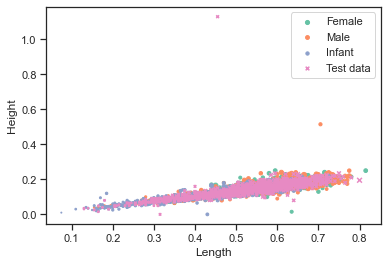

In [23]:
# Plot the training variables using pyplot

# Segregate the training data.
female = train[train['Sex'] == 'Female']
male = train[train['Sex'] == 'Male']
infant = train[train['Sex'] == 'Infant']

# New plot.
fig, ax = plt.subplots()

# Scatter plots for training data.
ax.scatter(female['Length'], female['Height'],female['Rings'], marker='o', label='Female')
ax.scatter(male['Length'], male['Height'], male['Rings'],marker='o', label='Male')
ax.scatter(infant['Length'], infant['Height'], infant['Rings'],marker='o', label='Infant')

# Scatter plot for testing data.
ax.scatter(test['Length'], test['Height'], test['Rings'],marker='x', label='Test data')

# Show the legend.
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.legend();

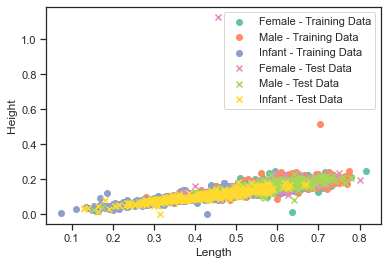

In [24]:
# Plot the training variables again as before using pyplot

# Segregate the training data.
female = train[train['Sex'] == 'Female']
male = train[train['Sex'] == 'Male']
infant = train[train['Sex'] == 'Infant']

# Segregate the test data.
Test_female = test[test['Sex'] == 'Female']
Test_male = test[test['Sex'] == 'Male']
Test_infant = test[test['Sex'] == 'Infant']

# New plot.
fig, ax = plt.subplots()

# Scatter plots for training data.
ax.scatter(female['Length'], female['Height'], marker='o', label='Female - Training Data')
ax.scatter(male['Length'], male['Height'], marker='o', label='Male - Training Data')
ax.scatter(infant['Length'], infant['Height'], marker='o', label='Infant - Training Data')

# Scatter plot for testing data.
ax.scatter(Test_female['Length'], Test_female['Height'], marker='x', label='Female - Test Data')
ax.scatter(Test_male['Length'], Test_male['Height'], marker='x', label='Male - Test Data')
ax.scatter(Test_infant['Length'], Test_infant['Height'], marker='x', label='Infant - Test Data')

# Show the legend.
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.legend();

#### Two Dimensions: Inputs and Outputs

In [25]:
# Give the inputs and outputs convenient names.  Predict the species (output) me based on a given sepal length/Petal Width (inputs)
inputs, outputs = train[['Length','Diameter','Height','Whole_Weight','Schucked_Weight','Viscera_Weight','Shell_Weight','Rings']], train['Sex']

In [26]:
# Peek at the inputs.
inputs.head()

,Length,Diameter,Height,Whole_Weight,Schucked_Weight,Viscera_Weight,Shell_Weight,Rings
3544,0.475,0.360,0.135,0.435,0.196,0.092,0.125,8
1469,0.530,0.430,0.130,0.705,0.346,0.141,0.189,9
2370,0.180,0.125,0.050,0.023,0.009,0.005,0.010,3
2865,0.320,0.205,0.080,0.181,0.088,0.034,0.050,5
2501,0.285,0.210,0.070,0.109,0.044,0.026,0.033,5


In [27]:
# Peek at the outputs.
outputs.head()

3544    Infant
1469    Infant
2370      Male
2865    Infant
2501    Infant
Name: Sex, dtype: object

#### Using Scikit learn to train the dataset
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [28]:
# Create a new classifier.  (random_state=0 - generally not required; just means the same random numbers are generated every time)
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data (input/output defined above). Method is 'lre-fit(inputs, outputs)'. 
lre.fit(inputs, outputs)

C:\Users\fiona\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [29]:
# Ask the classifier to classify the test data.
predictions = lre.predict(test[['Length','Diameter','Height','Whole_Weight','Schucked_Weight','Viscera_Weight','Shell_Weight','Rings']])
predictions

array(['Infant', 'Male', 'Infant', ..., 'Male', 'Female', 'Infant'],
      dtype=object)

In [30]:
# Eyeball the misclassifications.  Compare the predictions with the actual species and see how many were correct
predictions == test['Sex']

3754     True
1189    False
567     False
2647    False
1467    False
3207     True
2715     True
666     False
1783     True
506     False
3401     True
2598     True
822      True
274      True
1849     True
1276     True
3849    False
3461    False
2015    False
446     False
289      True
302     False
2967    False
153     False
3904    False
2669     True
3722     True
3190    False
160     False
2897    False
196     False
1928     True
312      True
329      True
2569     True
805      True
1680     True
1699     True
2027    False
2574    False
3725    False
2113     True
3676     True
2512    False
1984    False
2994     True
1510     True
3996     True
3557    False
397     False
3445     True
642     False
3315     True
1901     True
1104    False
1940    False
1150     True
2687     True
1602    False
417      True
3642     True
17      False
2752     True
2076    False
2919     True
109     False
1688     True
236      True
2297     True
1726    False
1521     True
1466  

In [31]:
# What proportion were correct?
result = lre.score(test[['Length','Diameter','Height','Whole_Weight','Schucked_Weight','Viscera_Weight','Shell_Weight','Rings']], test['Sex'])
print("The percentage of the predictions which were correct using logistical regression was",round(result*100,2),"%")

The percentage of the predictions which were correct using logistical regression was 56.42 %


## $k$ Nearest Neighbours Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


In [32]:
# Split the data frame in two.
train, test = mod.train_test_split(abalone_df)

In [33]:
# Use all four possible inputs.
inputs, outputs = train[['Length','Diameter','Height','Whole_Weight','Schucked_Weight','Viscera_Weight','Shell_Weight','Rings']], train['Sex']

In [34]:
# Classifier. (from imported above 'import sklearn.neighbors as nei')

knn = nei.KNeighborsClassifier()

In [35]:
# Fit.
knn.fit(inputs, outputs)

KNeighborsClassifier()

In [36]:
# Test.
knnresult = knn.score(test[['Length','Diameter','Height','Whole_Weight','Schucked_Weight','Viscera_Weight','Shell_Weight','Rings']], test['Sex'])
print("The percentage of the predictions which were correct using KNeighbors was",round(knnresult*100,2),"%")

The percentage of the predictions which were correct using KNeighbors was 54.69 %


In [37]:
# Predict.
predictions = lre.predict(test[['Length','Diameter','Height','Whole_Weight','Schucked_Weight','Viscera_Weight','Shell_Weight','Rings']])
(predictions == test['Sex']).value_counts()

True     605
False    439
Name: Sex, dtype: int64

In [38]:
# Predict.
predictions = lre.predict(test[['Length','Diameter','Height','Whole_Weight','Schucked_Weight','Viscera_Weight','Shell_Weight','Rings']])
(predictions == test['Sex']).value_counts()
#print("The percentage of the predictions which were correct using logistical regression was",round(result*100,2),"%")

True     605
False    439
Name: Sex, dtype: int64

In [39]:
 # The score is just the accuracy in this case.
(predictions == test['Sex']).value_counts(normalize=True)

True     0.58
False    0.42
Name: Sex, dtype: float64

In [40]:
# Validation

In [41]:
knn = nei.KNeighborsClassifier()
scores = mod.cross_val_score(knn, abalone_df[['Length','Diameter','Height','Whole_Weight','Schucked_Weight','Viscera_Weight','Shell_Weight','Rings']], abalone_df['Sex'])
scores

array([0.51196172, 0.55449102, 0.50299401, 0.52215569, 0.52814371])

In [42]:
print(f"Mean: {scores.mean()} \t Standard Deviation: {scores.std()}")

Mean: 0.5239492307251525 	 Standard Deviation: 0.01752959089976513


In [43]:
lre = lm.LogisticRegression(random_state=0)
scores = mod.cross_val_score(lre, abalone_df[['Length','Diameter','Height','Whole_Weight','Schucked_Weight','Viscera_Weight','Shell_Weight','Rings']], abalone_df['Sex'])
scores

C:\Users\fiona\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\fiona\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.48803828, 0.58802395, 0.51257485, 0.58802395, 0.57365269])

In [44]:
print(f"Mean: {scores.mean()} \t Standard Deviation: {scores.std()}")

Mean: 0.5500627453227516 	 Standard Deviation: 0.0416916515077987


#### Box Plots

#### References

[1] https://archive.ics.uci.edu/ml/datasets/Abalone